Experiemtne with HYCOM netcdf opening

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt 
import datetime
import numpy as np

from salishsea_tools.nowcast import figures, residuals
from salishsea_tools import viz_tools
%matplotlib inline

In [2]:
date = '20150729'
url = ('http://nomads.ncep.noaa.gov:9090/dods/rtofs/rtofs_global{}/rtofs_glo_2ds_forecast_3hrly_diag'.format(date))

In [3]:
f = nc.Dataset(url)

In [4]:
ssh=f.variables['ssh']
time = f.variables['time']
dates=nc.num2date(time[:],time.units)
lon=f.variables['lon']

In [5]:
f

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format UNDEFINED):
    title: 2D Sfc 3 Hourly Diagnostic 00Z29jul2015: Forecast, downloaded Jul 29 16:13 UTC
    Conventions: COARDS
GrADS
    dataType: Grid
    history: Wed Jul 29 19:23:02 UTC 2015 : imported by GrADS Data Server 2.0
    dimensions(sizes): lat(2160), lev(1), lon(4320), time(65)
    variables(dimensions): float64 time(time), float64 lev(lev), float64 lat(lat), float64 lon(lon), float32 ssh(time,lev,lat,lon), float32 ice_coverage(time,lev,lat,lon), float32 ice_thickness(time,lev,lat,lon)
    groups: 

In [6]:
lon

<type 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    grads_dim: x
    grads_mapping: linear
    grads_size: 4320
    units: degrees_east
    long_name: longitude
    minimum: 74.16
    maximum: 434.06227
    resolution: 0.08333
unlimited dimensions: 
current shape = (4320,)
filling off

In [7]:
dates

array([datetime.datetime(2015, 7, 29, 0, 0),
       datetime.datetime(2015, 7, 29, 3, 0),
       datetime.datetime(2015, 7, 29, 6, 0),
       datetime.datetime(2015, 7, 29, 9, 0),
       datetime.datetime(2015, 7, 29, 12, 0),
       datetime.datetime(2015, 7, 29, 15, 0),
       datetime.datetime(2015, 7, 29, 18, 0),
       datetime.datetime(2015, 7, 29, 21, 0),
       datetime.datetime(2015, 7, 30, 0, 0),
       datetime.datetime(2015, 7, 30, 3, 0),
       datetime.datetime(2015, 7, 30, 6, 0),
       datetime.datetime(2015, 7, 30, 9, 0),
       datetime.datetime(2015, 7, 30, 12, 0),
       datetime.datetime(2015, 7, 30, 15, 0),
       datetime.datetime(2015, 7, 30, 18, 0),
       datetime.datetime(2015, 7, 30, 21, 0),
       datetime.datetime(2015, 7, 31, 0, 0),
       datetime.datetime(2015, 7, 31, 3, 0),
       datetime.datetime(2015, 7, 31, 6, 0),
       datetime.datetime(2015, 7, 31, 9, 0),
       datetime.datetime(2015, 7, 31, 12, 0),
       datetime.datetime(2015, 7, 31, 15, 0),


In [8]:
print time

<type 'netCDF4._netCDF4.Variable'>
float64 time(time)
    grads_dim: t
    grads_mapping: linear
    grads_size: 65
    grads_min: 00z29jul2015
    grads_step: 3hr
    units: days since 1-1-1 00:00:0.0
    long_name: time
    minimum: 00z29jul2015
    maximum: 00z06aug2015
    resolution: 0.125
unlimited dimensions: 
current shape = (65,)
filling off



In [9]:
print time[:]

[ 735809.     735809.125  735809.25   735809.375  735809.5    735809.625
  735809.75   735809.875  735810.     735810.125  735810.25   735810.375
  735810.5    735810.625  735810.75   735810.875  735811.     735811.125
  735811.25   735811.375  735811.5    735811.625  735811.75   735811.875
  735812.     735812.125  735812.25   735812.375  735812.5    735812.625
  735812.75   735812.875  735813.     735813.125  735813.25   735813.375
  735813.5    735813.625  735813.75   735813.875  735814.     735814.125
  735814.25   735814.375  735814.5    735814.625  735814.75   735814.875
  735815.     735815.125  735815.25   735815.375  735815.5    735815.625
  735815.75   735815.875  735816.     735816.125  735816.25   735816.375
  735816.5    735816.625  735816.75   735816.875  735817.   ]


In [10]:
start = datetime.datetime(1,1,1)
dates2 = [start + datetime.timedelta(days = t) for t in time]

In [11]:
dates2

[datetime.datetime(2015, 7, 31, 0, 0),
 datetime.datetime(2015, 7, 31, 3, 0),
 datetime.datetime(2015, 7, 31, 6, 0),
 datetime.datetime(2015, 7, 31, 9, 0),
 datetime.datetime(2015, 7, 31, 12, 0),
 datetime.datetime(2015, 7, 31, 15, 0),
 datetime.datetime(2015, 7, 31, 18, 0),
 datetime.datetime(2015, 7, 31, 21, 0),
 datetime.datetime(2015, 8, 1, 0, 0),
 datetime.datetime(2015, 8, 1, 3, 0),
 datetime.datetime(2015, 8, 1, 6, 0),
 datetime.datetime(2015, 8, 1, 9, 0),
 datetime.datetime(2015, 8, 1, 12, 0),
 datetime.datetime(2015, 8, 1, 15, 0),
 datetime.datetime(2015, 8, 1, 18, 0),
 datetime.datetime(2015, 8, 1, 21, 0),
 datetime.datetime(2015, 8, 2, 0, 0),
 datetime.datetime(2015, 8, 2, 3, 0),
 datetime.datetime(2015, 8, 2, 6, 0),
 datetime.datetime(2015, 8, 2, 9, 0),
 datetime.datetime(2015, 8, 2, 12, 0),
 datetime.datetime(2015, 8, 2, 15, 0),
 datetime.datetime(2015, 8, 2, 18, 0),
 datetime.datetime(2015, 8, 2, 21, 0),
 datetime.datetime(2015, 8, 3, 0, 0),
 datetime.datetime(2015, 8, 3,

Ok, so there is a problem with how I was reading the date in the text file....

(735807.0, 735813.0)

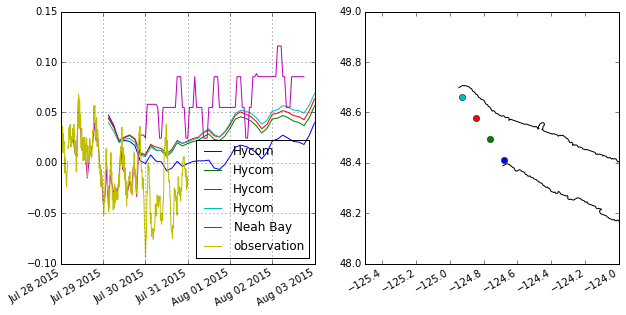

In [12]:
grid_b = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

fig,axs= plt.subplots(1,2,figsize=(10,5))
ax=axs[0]
axm=axs[1]
date = datetime.datetime(2015,7,20)

#Hycom
iss = np.arange(1934,1920,-1)
jss = np.arange(1661,1665)
f = nc.Dataset(url)
ssh = f.variables['ssh']
time = f.variables['time']
dates = nc.num2date(time[:],time.units)
lat = f.variables['lat']
lon=f.variables['lon']
for i,j in zip(iss,jss):
    #filename = read_url(date,i,j) read website
    ax.plot(dates,ssh[:,0,j,i],label='Hycom')
    axm.plot(lon[i]-360,lat[j],'o')
viz_tools.plot_coastline(axm,grid_b,coords='map')


#Neah Bay forecast
filename = '/ocean/nsoontie/MEOPAR/sshNeahBay/txt/sshNB_2015-07-29_21.txt'
NBdata = residuals._load_surge_data(filename)
surge, dates = residuals._retrieve_surge(NBdata, datetime.datetime(2015,7,29))
ax.plot(dates[:],surge[:],label = 'Neah Bay')

# Neah Bay observations
obs = figures.get_NOAA_wlevels(figures.SITES['Neah Bay']['stn_no'], '28-Jul-2015', '30-Jul-2015')
tides = figures.get_NOAA_tides(figures.SITES['Neah Bay']['stn_no'], '28-Jul-2015', '30-Jul-2015')

res = residuals.calculate_residual(obs.wlev, obs.time, tides.pred, tides.time)
ax.plot(obs.time,res,label='observation')


axm.set_xlim([-125.5,-124])
axm.set_ylim([48,49])
ax.legend(loc=0)
ax.grid()
fig.autofmt_xdate()
ax.set_xlim([datetime.datetime(2015,7,28),datetime.datetime(2015,8,3)])

#Temperature and salinty

In [13]:
date = '20150729'
url = ('http://nomads.ncep.noaa.gov:9090/dods/rtofs/rtofs_global{}/rtofs_glo_3dz_nowcast_6hrly_reg2'.format(date))

In [14]:
f=nc.Dataset(url)

In [15]:
f

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format UNDEFINED):
    title: 3D Volume 6hrly Region 2 00Z27jul2015: Nowcast downloaded Jul 29 05:12 UTC
    Conventions: COARDS
GrADS
    dataType: Grid
    history: Thu Jul 30 14:33:45 UTC 2015 : imported by GrADS Data Server 2.0
    dimensions(sizes): lat(1600), lev(40), lon(1000), time(9)
    variables(dimensions): float64 time(time), float64 lev(lev), float64 lat(lat), float64 lon(lon), float32 salinity(time,lev,lat,lon), float32 temperature(time,lev,lat,lon), float32 u(time,lev,lat,lon), float32 v(time,lev,lat,lon)
    groups: 

In [16]:
sal=f.variables['salinity']
lon=f.variables['lon']
lat=f.variables['lat']
dep=f.variables['lev']

<matplotlib.colorbar.Colorbar instance at 0x7f629847cdd0>

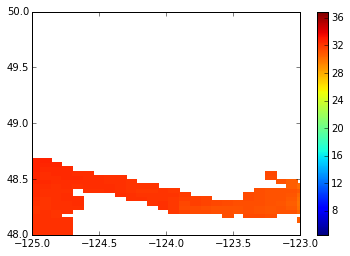

In [17]:
plt.pcolormesh(lon[:], lat[:],sal[1,0,:,:])
plt.axis([-125,-123,48,50])
plt.colorbar()

In [18]:
iss = np.where(np.logical_and(lon[:]<-124.5, lon[:] > -125))
jss = np.where(np.logical_and(lat[:] > 48.4, lat[:] < 48.6))

In [19]:
jss

(array([1011, 1012, 1013, 1014, 1015]),)

In [20]:
iss

(array([412, 413, 414, 415, 416, 417]),)

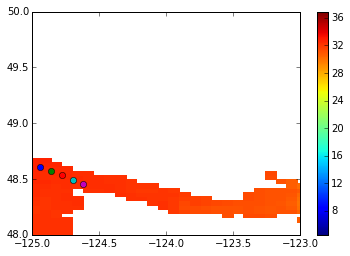

In [21]:
plt.pcolormesh(lon[:], lat[:],sal[1,0,:,:])
plt.axis([-125,-123,48,50])
plt.colorbar()

for i,j in zip(iss[0][0:-1],jss[0][::-1]+1):
    plt.plot(lon[i],lat[j],'o')

<matplotlib.colorbar.Colorbar instance at 0x7f62980c5560>

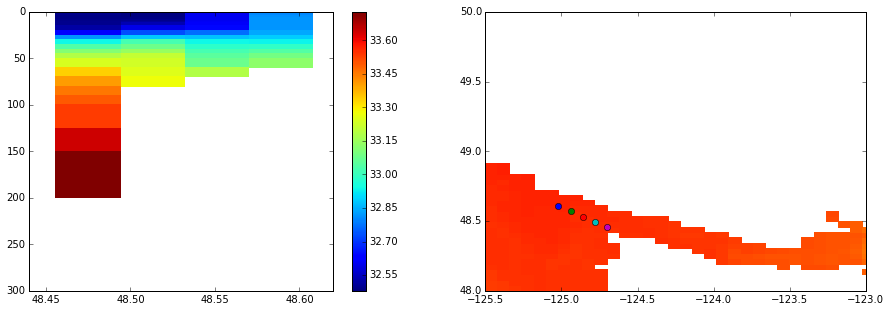

In [22]:
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[1].pcolormesh(lon[:], lat[:],sal[1,0,:,:])
axs[1].set_xlim([-125.5,-123])
axs[1].set_ylim([48,50])

new_sal = np.ma.zeros((40,5))
new_lat=np.zeros(5)
count=0
for i,j in zip(iss[0]-1,jss[0][::-1]+1):
    new_sal[:,count] = sal[1,:,j,i]
    new_lat[count] = lat[j]
    count=count+1
    axs[1].plot(lon[i],lat[j],'o')
mesh=axs[0].pcolormesh(new_lat, dep[:],new_sal)
axs[0].set_ylim([300,0])
plt.colorbar(mesh,ax=axs[0])




Is it possible to interpolate this product onto our bcs?

[32, 34, 300, 0]

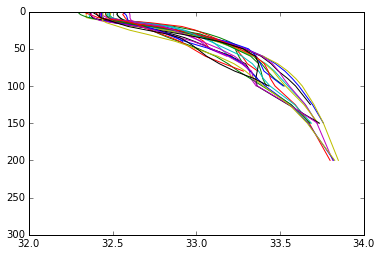

In [23]:
for i in iss[0]:
    for j in jss[0]:
        plt.plot(sal[1,:,j,i],dep[:])
plt.axis([32,34,300,0])

I don't think this is getting as fresh as our model is in the surface. 

Does this model account for river discharge? Probably not. 

Maybe it could be useful for the deep water an upwelling? But it isn't very deep...

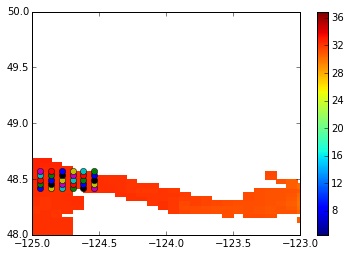

In [24]:
plt.pcolormesh(lon[:], lat[:],sal[1,0,:,:])
plt.axis([-125,-123,48,50])
plt.colorbar()

for i in iss[0]:
    for j in jss[0]:
        plt.plot(lon[i],lat[j],'o')